<font size="5">**Importing libraries**</font>

In [122]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [123]:
data = pd.read_csv("/kaggle/input/embedding-for-future-us-taskcsv/lol.csv")
df = data.drop(['id'],axis=1)

<font size="5">**Initializing algrotihms**</font>

In [124]:
heir_clus =  AgglomerativeClustering(n_clusters=10)
kmeans  = KMeans()

<font size="5">**Plotting Kmeans for different k**</font>

In [125]:
sse = []
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

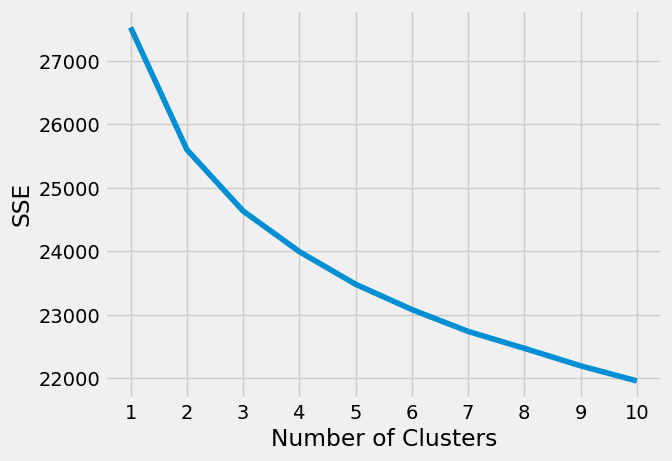

In [126]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [127]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

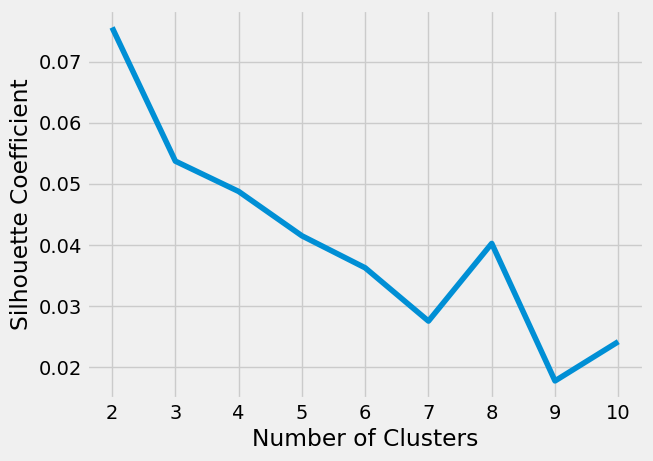

In [128]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

<font size="5">**Predictions**</font>

In [129]:
h = heir_clus.fit_predict(df)
k = kmeans.fit_predict(df)

In [130]:
np.unique(heir_clus.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [131]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [132]:
pred = pd.DataFrame(columns = ['id','cluster_heri_pred(0-9)','cluster_km_pred(0-9)'])
pred['id'] = data['id']
pred['cluster_heri_pred(0-9)']=h
pred['cluster_km_pred(0-9)']=k

In [133]:
pred

,id,cluster_heri_pred(0-9),cluster_km_pred(0-9)
0,1,0,4
1,4,7,8
2,6,0,9
3,3,7,8
4,15,0,4
...,...,...,...
2049,2497,1,8
2050,2499,6,0
2051,2498,7,5
2052,2500,5,6
